In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [8]:
onehot = OneHotEncoder()
encoder_df = pd.DataFrame(onehot.fit_transform(df[['Sex']]).toarray())
final_df = df.join(encoder_df)

In [9]:
final_df.rename(columns = {0:'female'}, inplace = True)

In [10]:
final_df.rename(columns = {1:'male'}, inplace = True)

In [11]:
final_df.drop(['Sex'], axis=1, inplace=True)

In [12]:
final_df.drop(['Cabin'], axis=1, inplace=True)

In [13]:
final_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1.0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,S,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C,1.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,S,0.0,1.0


In [14]:
final_df['Age'].fillna(final_df['Age'].mean(),inplace=True)

In [15]:
final_df['Fare'] = final_df['Fare'].fillna(final_df['Fare'].mode()[0])

In [16]:
final_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
female         0
male           0
dtype: int64

In [17]:
final_df.shape

(418, 12)

In [18]:
encoder_df = pd.DataFrame(onehot.fit_transform(final_df[['Embarked']]).toarray())
final_df = final_df.join(encoder_df)

In [19]:
final_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,0,1,2
0,892,0,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,Q,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,S,1.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,Q,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,S,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,S,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [20]:
final_df.rename(columns = {0:'C',1:'Q',2:'S'}, inplace = True)

In [21]:
final_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,892,0,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,Q,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,S,1.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,Q,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,S,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,S,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [22]:
final_df.drop(['Embarked'], axis=1, inplace=True)

In [23]:
final_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,892,0,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,0.0,1.0,0.0,0.0,1.0


In [24]:
final_df.drop(['Name'], axis=1, inplace=True)

In [25]:

final_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,892,0,3,34.50000,0,0,330911,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,1,3,47.00000,1,0,363272,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,0,2,62.00000,0,0,240276,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,0,3,27.00000,0,0,315154,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,1,3,22.00000,1,1,3101298,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,A.5. 3236,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,39.00000,0,0,PC 17758,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,30.27259,0,0,359309,8.0500,0.0,1.0,0.0,0.0,1.0


In [26]:
final_df.isnull().sum()/final_df.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
female         0.0
male           0.0
C              0.0
Q              0.0
S              0.0
dtype: float64

In [27]:
final_df['Ticket'] = pd.factorize(df['Ticket'])[0]
final_df['Ticket'].nunique()

363

In [28]:
final_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.877124,0.008767,-0.023245,0.023245,-0.027419,-0.035731,0.048008
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,-0.064568,0.192229,1.000000,-1.000000,0.033684,0.115574,-0.105883
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,0.024305,-0.577491,-0.108615,0.108615,-0.318543,0.252608,0.120783
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,-0.013848,0.323839,-0.000011,0.000011,0.161612,-0.012719,-0.136822
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,-0.110653,0.172034,0.099943,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,-0.071905,0.230411,0.159120,-0.159120,-0.005791,-0.132948,0.092201
Ticket,0.877124,-0.064568,0.024305,-0.013848,-0.110653,-0.071905,1.000000,-0.107964,-0.064568,0.064568,-0.041114,0.015913,0.026511
Fare,0.008767,0.192229,-0.577491,0.323839,0.172034,0.230411,-0.107964,1.000000,0.192229,-0.192229,0.312627,-0.155072,-0.179296
female,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,-0.064568,0.192229,1.000000,-1.000000,0.033684,0.115574,-0.105883
male,0.023245,-1.000000,0.108615,0.000011,-0.099943,-0.159120,0.064568,-0.192229,-1.000000,1.000000,-0.033684,-0.115574,0.105883


In [29]:
#Here, we find that all females survived and all mails did not, since they are completely correlated, we have to drop those columns
final_df.drop(['female','male'], axis=1, inplace=True)

In [30]:
final_df['Pclass'].describe()

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

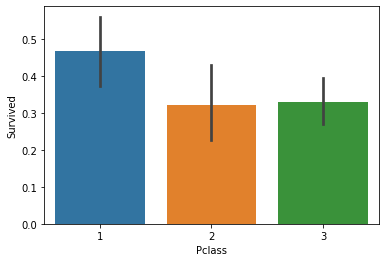

In [31]:
sns.barplot(x='Pclass',y='Survived',data=final_df)

In [32]:
log_reg = LogisticRegression()

In [33]:
final_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'C', 'Q', 'S'],
      dtype='object')

In [34]:
X = final_df[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'C', 'Q', 'S']]
y= final_df['Survived']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [36]:
model_log = log_reg.fit(X_train,y_train)

In [37]:
model_log.score(X_test,y_test)

0.5714285714285714

In [38]:
y_pred = model_log.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[41,  9],
       [27,  7]], dtype=int64)

In [40]:
dec_class = DecisionTreeClassifier()

In [41]:
model_dec_class = dec_class.fit(X_train,y_train)

In [42]:
model_dec_class.score(X_test,y_test)

0.6428571428571429

<AxesSubplot:>

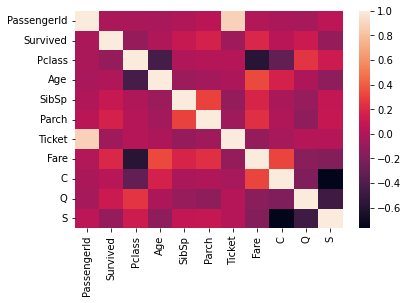

In [43]:
sns.heatmap(final_df.corr())

In [44]:
#  rf_grid = {"n_estimators": np.arange(50, 300, 50),
#             "max_depth": [3,5,7],
#             "min_samples_split": np.arange(2, 10, 1),
#             "min_samples_leaf": np.arange(1, 10, 1),
#             }

# # Instantiate Random Search model and since we are using regression, we use mean_squared_error as it is calculated from actual and predicted values
# for i in tqdm(range(0, 100), desc ="Text You Want"):
#     rs_model = RandomizedSearchCV(RandomForestClassifier(),rf_grid,cv=5,scoring='neg_mean_squared_error',verbose=True)
#  # fit
#  rs_model.fit(X, y)

In [45]:
# rs_model.best_score_

In [46]:
# rs_model.best_params_

In [47]:
# rs_model.best_estimator_

In [48]:
rand_class = RandomForestClassifier()

In [49]:
model_rand_class = rand_class.fit(X_train,y_train)

In [50]:
model_rand_class.score(X_test,y_test)

0.6071428571428571

In [51]:
joblib.dump(model_rand_class,'random_forest_model.joblib')

['random_forest_model.joblib']

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

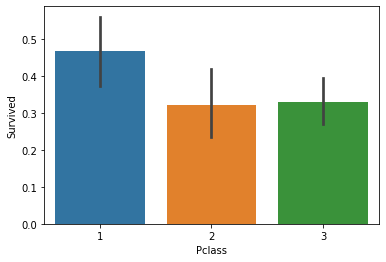

In [52]:
sns.barplot(x='Pclass',y='Survived',data=final_df)

In [53]:
final_df[final_df['Pclass']==1]['Survived'].unique()

array([0, 1], dtype=int64)

In [54]:
final_df[final_df['Pclass']==2]['Survived'].unique()

array([0, 1], dtype=int64)

In [55]:
final_df[final_df['Pclass']==3]['Survived'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

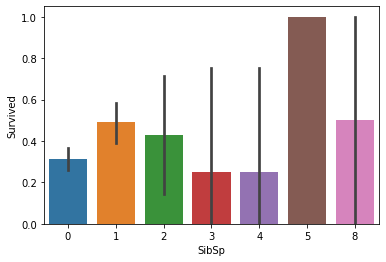

In [56]:
sns.barplot(x='SibSp',y='Survived',data=final_df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

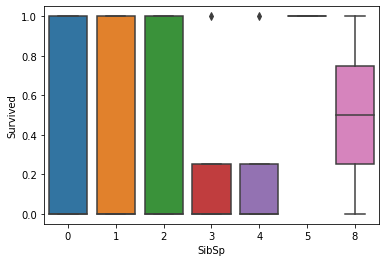

In [57]:
sns.boxplot(x='SibSp',y='Survived',data=final_df)

In [58]:
df[df['SibSp']==8]['Survived'].describe()

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: Survived, dtype: float64

In [59]:
df[df['SibSp']==5]['Survived'].describe()

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

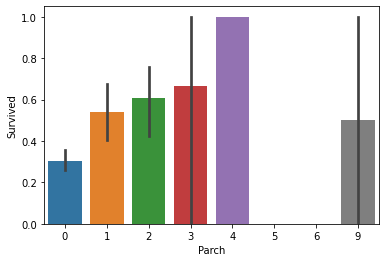

In [60]:
sns.barplot(x='Parch',y='Survived',data=final_df)

In [61]:
df[df['Parch']==0]['Survived'].describe()

count    324.000000
mean       0.305556
std        0.461355
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [62]:
xgb_classifier = xgb.XGBClassifier()
model_xgb_classifier = xgb_classifier.fit(X_train, y_train)

In [63]:
model_xgb_classifier.score(X_test,y_test)

0.6071428571428571